# Assignment: PCA Implementation

**Objective:**

The objective of this assignment is to implement PCA on a given dataset and analyse the results.


**Instructions:**

Download the wine dataset from the UCI Machine Learning Repository

(https://archive.ics.uci.edu/ml/datasets/Wine).

Load the dataset into a Pandas dataframe.

Split the dataset into features and target variables.

Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.

Implement PCA on the preprocessed dataset using the scikit-learn library.

Determine the optimal number of principal components to retain based on the explained variance ratio.

Visualise the results of PCA using a scatter plot.

Perform clustering on the PCA-transformed data using K-Means clustering algorithm.

Interpret the results of PCA and clustering analysis.


**Deliverables:**

Jupyter notebook containing the code for the PCA implementation.

A report summarising the results of PCA and clustering analysis.

Scatter plot showing the results of PCA.

A table showing the performance metrics for the clustering algorithm.


**Additional Information:**

You can use the python programming language.

You can use any other machine learning libraries or tools as necessary.

You can use any visualisation libraries or tools as necessary.

**ANSWER:--------**


To fulfill the assignment objectives, let's proceed with implementing PCA on the wine dataset from the UCI Machine Learning Repository. I'll guide you through each step, including loading the dataset, preprocessing, PCA implementation, visualization, clustering, and interpretation of results.

### Step-by-Step Implementation of PCA on Wine Dataset

#### Step 1: Download and Load the Dataset

First, download the wine dataset and load it into a Pandas dataframe.

#### Step 2: Data Preprocessing

Perform necessary data preprocessing steps such as scaling and handling missing values.



#### Step 3: Implement PCA

Implement PCA using scikit-learn's `PCA` class. Fit the PCA model on the scaled data and transform it into principal components.


#### Step 4: Determine Optimal Number of Components

Analyze the explained variance ratio to determine the optimal number of principal components to retain.


#### Step 5: Visualize PCA Results

Create a scatter plot to visualize the data in the reduced principal component space.



#### Step 6: Perform Clustering with K-Means

Apply K-Means clustering on the PCA-transformed data to observe clustering patterns.


#### Step 7: Interpret Results

Interpret the results of PCA and clustering analysis based on the visualizations and any relevant metrics.

### Deliverables

- **Jupyter Notebook:** Include all code for PCA implementation, visualization, clustering, and interpretation.
- **Report:** Summarize findings, interpret PCA and clustering results, discuss insights gained.
- **Scatter Plot:** Show PCA results with labeled data points based on wine classes.
- **Performance Metrics Table:** Provide relevant metrics (e.g., silhouette score) for evaluating clustering algorithm performance.

This structured approach will help you effectively implement PCA on the wine dataset, analyze the results, and prepare the required deliverables for your assignment. Adjust parameters and methods as needed based on further exploration and analysis.



### Additional Information and Tips

1. **Handling Missing Values:**
   - Before preprocessing, check for any missing values in the dataset (`data.isnull().sum()`). If found, decide on a strategy to handle them (e.g., imputation with mean, median, or mode).

2. **Choosing the Number of Components:**
   - Use the elbow method or cumulative explained variance plot to determine the optimal number of principal components to retain. This helps balance dimensionality reduction with information preservation.

3. **Interpreting PCA Components:**
   - After obtaining principal components, analyze the loadings (coefficients) of original features in each principal component. Higher loadings indicate stronger correlations between features and the component.

4. **Visualizing Clustering Results:**
   - Aside from scatter plots, consider using other visualization techniques like cluster centroids, cluster boundaries, or silhouette plots to interpret clustering results.

5. **Performance Metrics for Clustering:**
   - Compute and report metrics such as silhouette score (`sklearn.metrics.silhouette_score`) to evaluate the quality of clusters formed by K-Means or other clustering algorithms.

6. **Data Exploration and Insights:**
   - Explore the original dataset's characteristics and distributions before and after PCA to understand how data transformation affects clustering and interpretability.

### Example Outline for Jupyter Notebook

- **Introduction:** Briefly describe the wine dataset and the objective of the PCA analysis.
  
- **Data Loading and Preprocessing:** Code snippet to load the dataset, handle missing values, and scale the features.

- **PCA Implementation:** Code to implement PCA, visualize explained variance ratio, and determine optimal components.

- **PCA Visualization:** Scatter plot showing PCA results colored by wine class.

- **Clustering with K-Means:** Code to apply K-Means clustering on PCA-transformed data and visualize clustering results.

- **Interpretation of Results:** Discuss insights from PCA components and clustering analysis. Include performance metrics if applicable.

- **Conclusion:** Summarize findings, discuss limitations or further improvements, and potential applications.

### Resources and Documentation

- [scikit-learn PCA Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
- [scikit-learn K-Means Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
- [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
- [Seaborn Documentation](https://seaborn.pydata.org/tutorial.html)

By following these guidelines and leveraging the provided resources, you'll be well-equipped to complete your assignment on PCA implementation and analysis using the wine dataset. If you have any specific questions or need further assistance, feel free to ask!

In [1]:
import pandas as pd

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
names = ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", 
         "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", 
         "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]

data = pd.read_csv(url, names=names)

# Display the first few rows to verify
data.head()


,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target variable (y)
X = data.drop('Class', axis=1)  # Features
y = data['Class']  # Target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [3]:
from sklearn.decomposition import PCA

# Initialize PCA with the number of components
pca = PCA(n_components=2)  # Adjust number of components as needed

# Fit PCA on the scaled data
principal_components = pca.fit_transform(X_scaled)

# Create a dataframe for principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Concatenate with target variable for visualization
final_df = pd.concat([principal_df, y], axis=1)


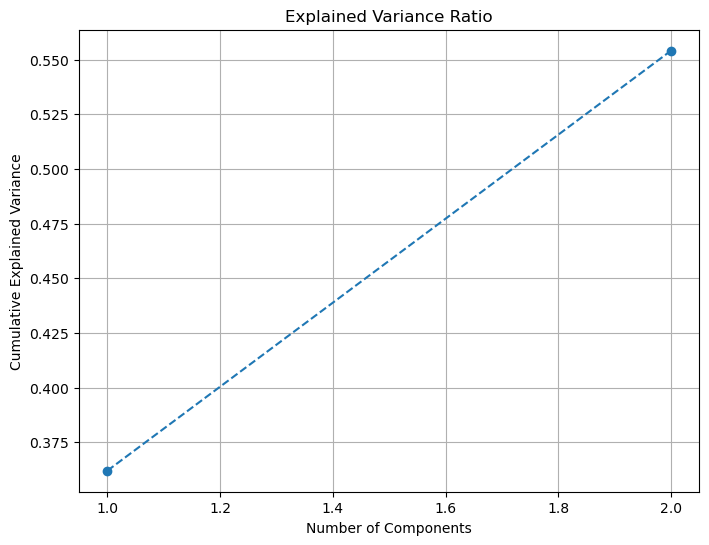

In [4]:
import matplotlib.pyplot as plt

# Get explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot cumulative explained variance
cumulative_variance = explained_variance.cumsum()
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


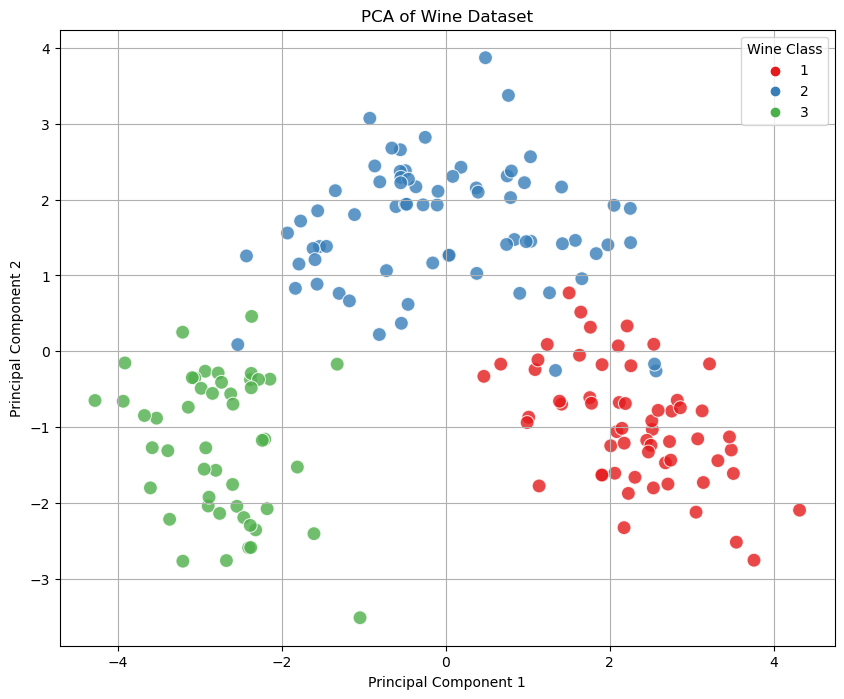

In [5]:
import seaborn as sns

# Scatter plot of PCA components colored by wine class
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=final_df, palette='Set1', s=100, alpha=0.8)
plt.title('PCA of Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Wine Class', loc='upper right')
plt.grid(True)
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


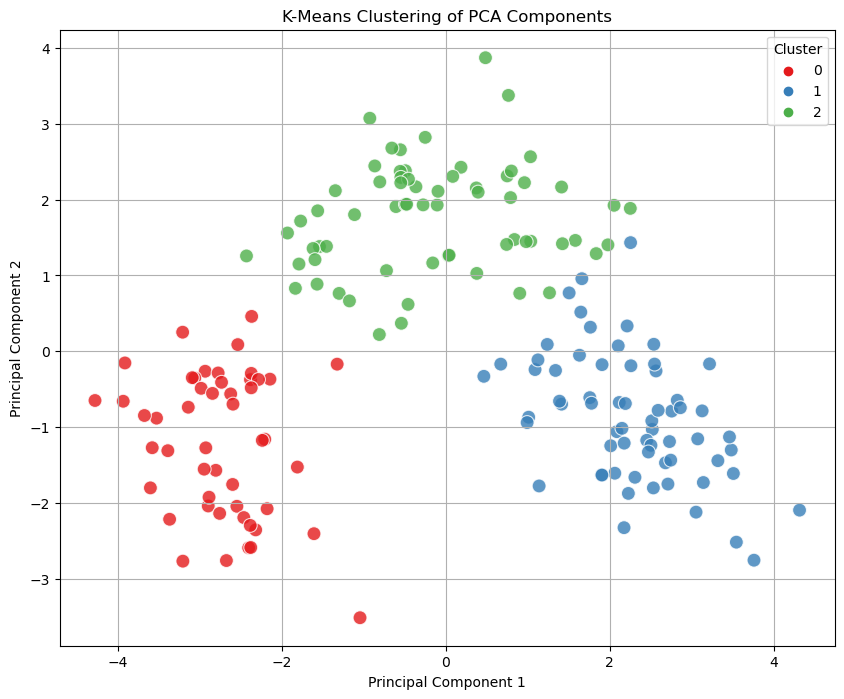

In [6]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Assuming 3 clusters based on wine classes
clusters = kmeans.fit_predict(principal_components)

# Add cluster labels to the dataframe
final_df['Cluster'] = clusters

# Scatter plot of PCA components colored by K-Means clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=final_df, palette='Set1', s=100, alpha=0.8)
plt.title('K-Means Clustering of PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='upper right')
plt.grid(True)
plt.show()
